In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [5]:
data = pd.read_csv('/content/raw_house_data - raw_house_data.csv')
data.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8.0,8921.0,4.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7.0,5238.0,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6.0,6480.0,3.0,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


In [6]:
data.shape

(5000, 16)

In [7]:
data.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [8]:
data.isnull().any()

,0
MLS,False
sold_price,False
zipcode,False
longitude,False
latitude,False
lot_acres,True
taxes,False
year_built,False
bedrooms,False
bathrooms,True


In [9]:
median_garage = data['garage'].median()
data['garage']=data['garage'].fillna(median_garage)
median_garage

3.0

In [10]:
data['garage'] = data['garage'].astype(int)
print(data['garage'].dtype)

int64


In [11]:
bathrooms = data['bedrooms']
data['bathrooms'] = data['bathrooms'].fillna(bathrooms)
data['bathrooms'] = data.apply(lambda row: row['bedrooms'] if row['bathrooms'] > row['bedrooms'] else row['bathrooms'], axis=1)

In [12]:
data['bathrooms'] = data['bathrooms'].astype(int)
print(data['bathrooms'].dtype)

int64


In [13]:
data['floor_covering'] = data['floor_covering'].fillna(0)

In [14]:
data['kitchen_features'] = data['kitchen_features'].fillna(0)

In [15]:
median_sqrt_ft = data['sqrt_ft'].median()
data['sqrt_ft']=data['sqrt_ft'].fillna(median_sqrt_ft)

median_sqrt_ft

3512.0

In [16]:
median_lot_acres = data['lot_acres'].median()
data['lot_acres']=data['lot_acres'].fillna(median_lot_acres)

median_lot_acres

0.99

In [17]:
median_fireplaces = data['fireplaces'].median()
data['fireplaces'] = data['fireplaces'].fillna(median_fireplaces)

In [18]:
data['fireplaces'] = pd.to_numeric(data['fireplaces'], errors='coerce').fillna(0).astype(int)
print(data['fireplaces'].dtype)

int64


In [19]:
data['HOA'] = pd.to_numeric(data['HOA'], errors='coerce')
median_hoa = data['HOA'].median()
data['HOA'] = data['HOA'].fillna(median_hoa)

In [20]:
data.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


In [21]:
data.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,int64


In [22]:
data.to_csv('file2.csv', header=False, index=False)
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.0,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.0,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,2,3512.0,3,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",55.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",55.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,4,6396.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0


In [23]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

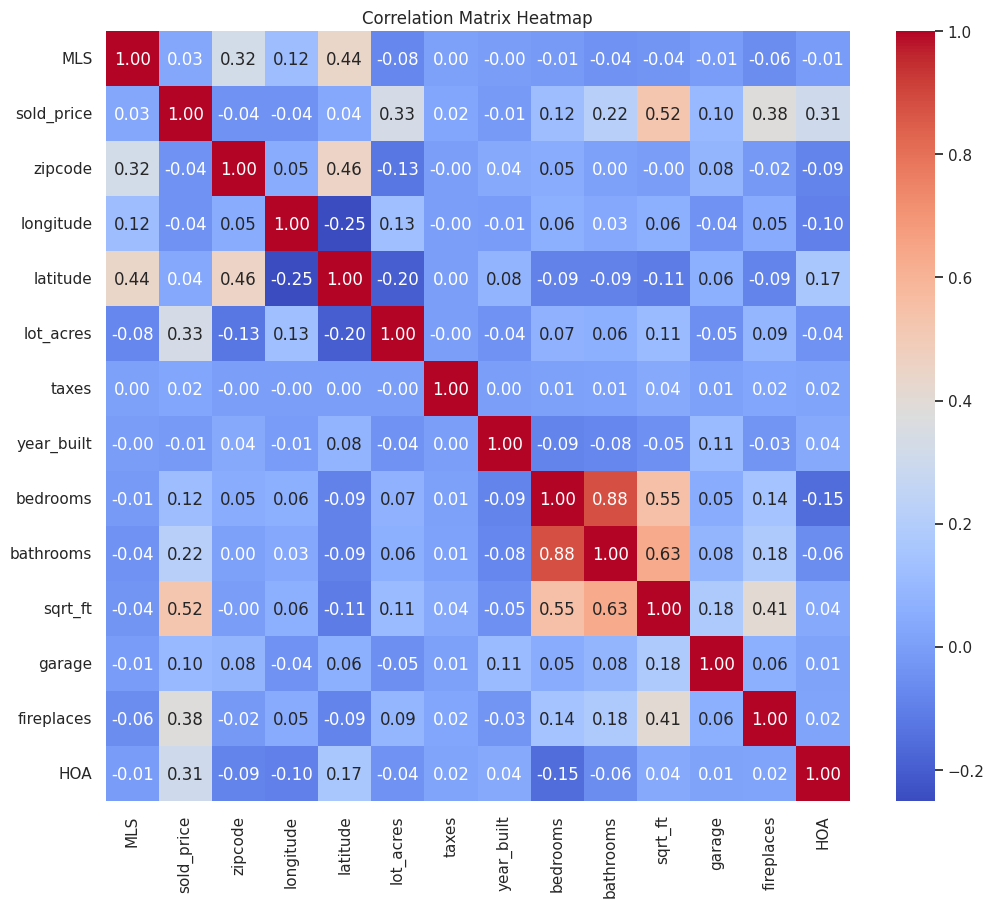

In [24]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
data['price_per_sqft'] = data['sold_price'] / data['sqrt_ft']

In [26]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price_per_sqft
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.0,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0,504.761905
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.0,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0,575.342466
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,2,3512.0,3,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",55.0,1195.899772
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",55.0,498.946668
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,4,6396.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0,533.372420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,137.461816
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318.0,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0,237.273512
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772.0,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,55.0,268.058691
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,147.690655


In [27]:
data['Cat_price_per_sqft'] = pd.qcut(data['price_per_sqft'], q=20, labels=False, duplicates='drop')

In [28]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price_per_sqft,Cat_price_per_sqft
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.0,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0,504.761905,19
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.0,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0,575.342466,19
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,2,3512.0,3,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",55.0,1195.899772,19
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",55.0,498.946668,19
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,4,6396.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0,533.372420,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,137.461816,0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318.0,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0,237.273512,15
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772.0,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,55.0,268.058691,17
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,147.690655,1


##KNN Classifier

In [29]:
# Prepare the Data
X_train = data[['longitude', 'latitude']].values
y_knn = data['Cat_price_per_sqft'].values

In [30]:
class KNNClassifier:
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K=3, epsilon=1e-5):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X - X[i]) ** 2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1 / (np.sqrt(dist2[idxt] + epsilon))
            y_hat[i] = np.bincount(self.y[idxt].astype(int), weights=gamma_k).argmax()

        return y_hat

In [31]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [32]:
knn = KNNClassifier()

In [33]:
knn.fit(X_train,y_knn)

In [34]:
y_hat = knn.predict(X_train,K=3)

In [35]:
accuracy = np.mean(y_hat==y_knn)
accuracy

0.9078

In [36]:
data['Category_price_per_sqft'] = y_hat

In [37]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price_per_sqft,Cat_price_per_sqft,Category_price_per_sqft
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.0,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0,504.761905,19,19.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.0,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0,575.342466,19,19.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,2,3512.0,3,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",55.0,1195.899772,19,4.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",55.0,498.946668,19,19.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,4,6396.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0,533.372420,19,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,137.461816,0,0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318.0,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0,237.273512,15,9.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772.0,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,55.0,268.058691,17,17.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,147.690655,1,1.0


In [38]:
data['rooms'] = data['bedrooms'] + data['bathrooms']

In [39]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,price_per_sqft,Cat_price_per_sqft,Category_price_per_sqft,rooms
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.0,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0,504.761905,19,19.0,23
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.0,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0,575.342466,19,19.0,4
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,2,3512.0,3,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",55.0,1195.899772,19,4.0,4
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",55.0,498.946668,19,19.0,12
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,4,6396.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0,533.372420,19,19.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3,3601.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,137.461816,0,0.0,8
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3,2318.0,3,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0,237.273512,15,9.0,7
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2,1772.0,0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,55.0,268.058691,17,17.0,5
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4,3724.0,3,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",55.0,147.690655,1,1.0,8


In [40]:
average_prices = data.groupby('zipcode')['sold_price'].mean().reset_index()

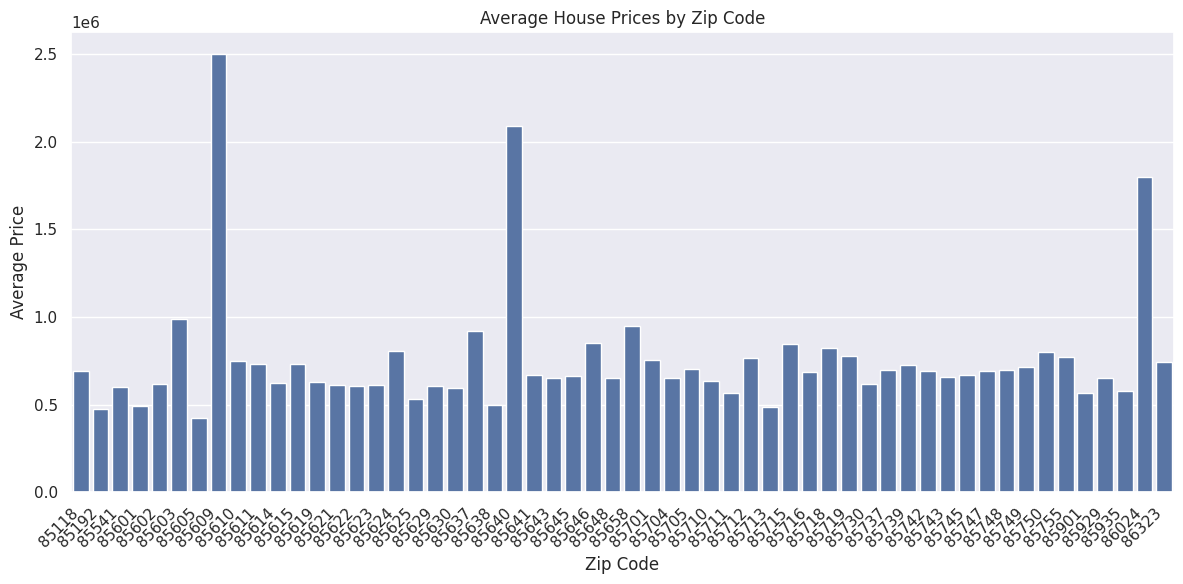

In [41]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='zipcode', y='sold_price', data=average_prices)
plt.title('Average House Prices by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [42]:
#zipcode_of_interest = 85266  # Replace with your desired zip code #85750
#filtered_data = data[data['zipcode'] == zipcode_of_interest]

In [43]:
zipcode_of_interest = 85750  # Replace with your desired zip code #85750
filtered_data = data[data['zipcode'] == zipcode_of_interest]

In [44]:
median_with_garage = filtered_data[filtered_data['garage'] > 0]['sold_price'].median()
median_without_garage = filtered_data[filtered_data['garage'] == 0]['sold_price'].median()

In [45]:
median_with_garage = data[data['garage'] > 0]['sold_price'].median()
median_without_garage = data[data['garage'] == 0]['sold_price'].median()

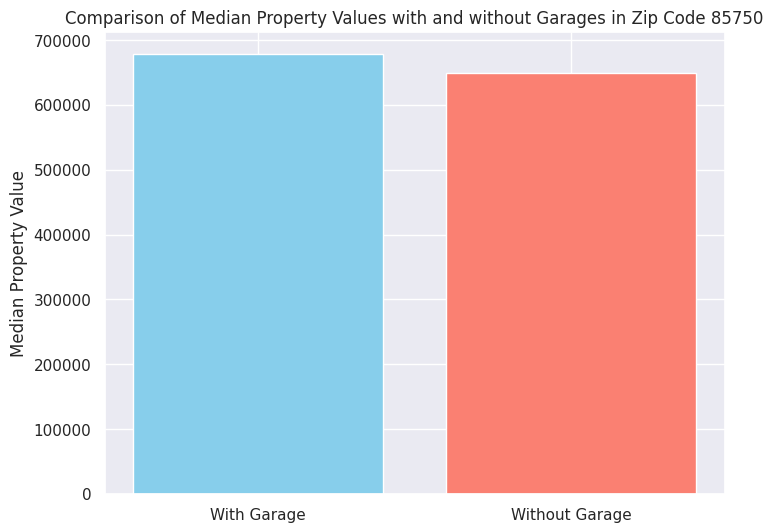

In [46]:
categories = ['With Garage', 'Without Garage']
median_values = [median_with_garage, median_without_garage]

plt.figure(figsize=(8, 6))
plt.bar(categories, median_values, color=['skyblue', 'salmon'])
plt.title(f'Comparison of Median Property Values with and without Garages in Zip Code {zipcode_of_interest}')
plt.ylabel('Median Property Value')
plt.show()

In [47]:
garage_counts = data.groupby(['zipcode', 'garage'])['sold_price'].count().reset_index()
garage_counts = garage_counts.rename(columns={'sold_price': 'count'})
garage_counts['garage'] = garage_counts['garage'].apply(lambda x: 'With Garage' if x > 0 else 'Without Garage')

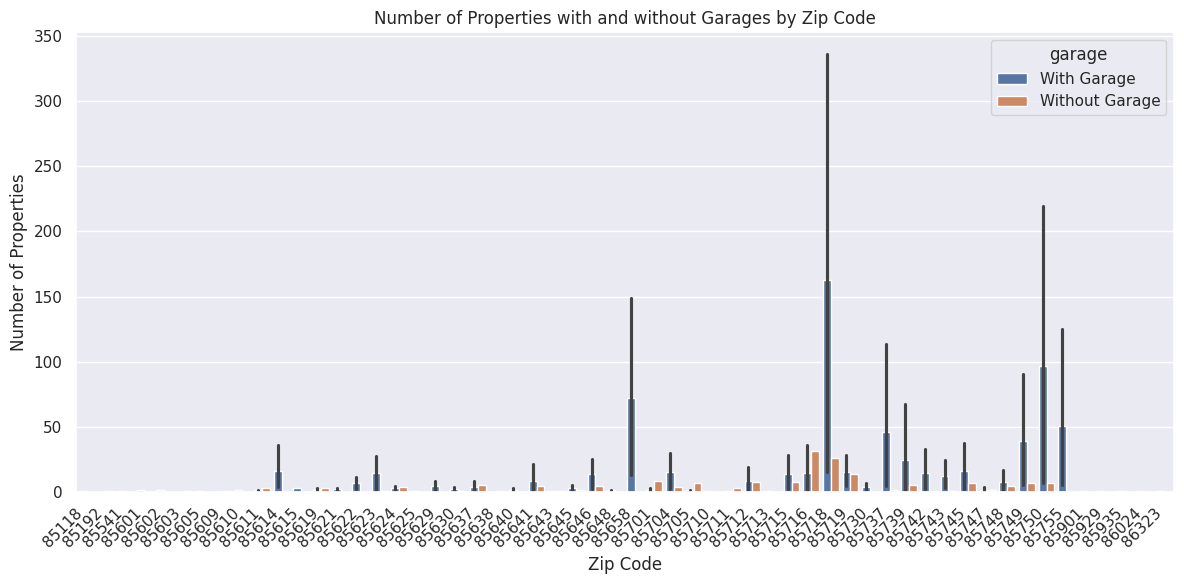

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='count', hue='garage', data=garage_counts)
plt.title('Number of Properties with and without Garages by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
average_prices = data.groupby(['longitude', 'latitude'])['sold_price'].mean().reset_index()

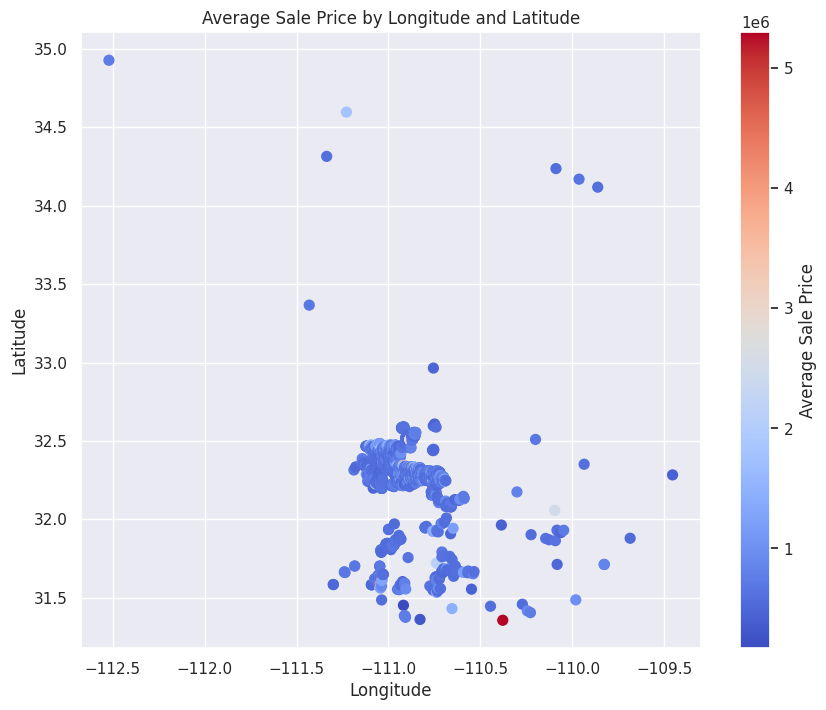

In [50]:
plt.figure(figsize=(10, 8))
plt.scatter(average_prices['longitude'], average_prices['latitude'],
            c=average_prices['sold_price'], cmap='coolwarm', s=50)  # Adjust 's' for marker size
plt.colorbar(label='Average Sale Price')
plt.title('Average Sale Price by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

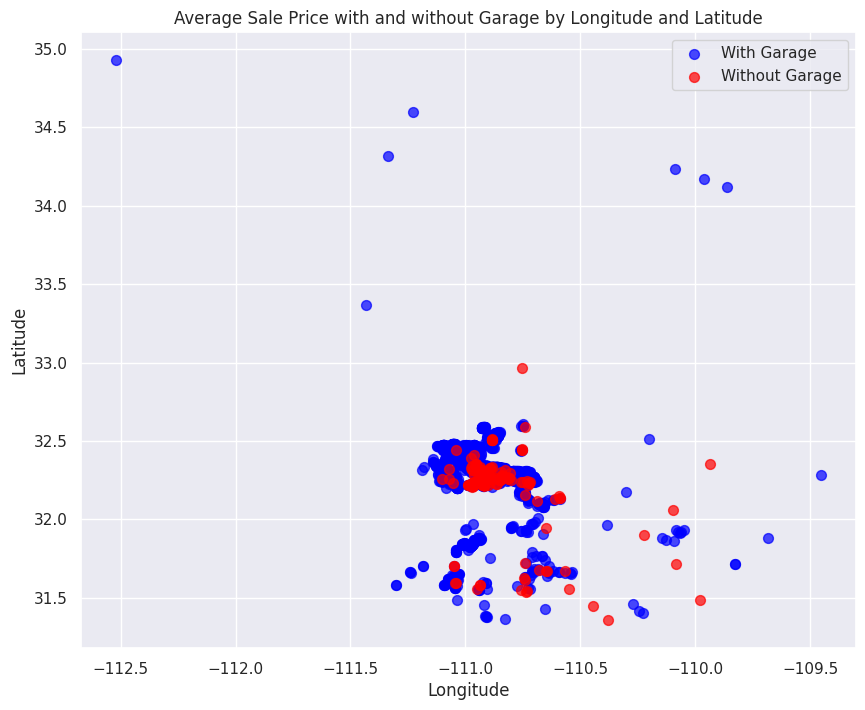

In [51]:
average_prices = data.groupby(['longitude', 'latitude', (data['garage'] > 0)])['sold_price'].mean().reset_index()
average_prices.rename(columns={'(data[\'garage\'] > 0)': 'has_garage', 'sold_price': 'avg_price'}, inplace=True)

# Create a scatter plot with color-coded points and legend
plt.figure(figsize=(10, 8))

# Separate data for houses with and without garages
with_garage = average_prices[average_prices['garage'] == True]
without_garage = average_prices[average_prices['garage'] == False]

# Plot points with different colors and labels
plt.scatter(with_garage['longitude'], with_garage['latitude'],
            c='blue', label='With Garage', s=50, alpha=0.7)
plt.scatter(without_garage['longitude'], without_garage['latitude'],
            c='red', label='Without Garage', s=50, alpha=0.7)

plt.legend()  # Add the legend
plt.title('Average Sale Price with and without Garage by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#KNN Regressor

In [53]:
# Prepare the Data
X_train = data[['longitude','latitude','garage','lot_acres','rooms','price_per_sqft','Category_price_per_sqft']].values
y_knnr = data['sold_price'].values

In [54]:
class KNNRegressor():
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.train_errors = []

    def predict(self,X,K,epsilon = 1e-4):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2,axis = 1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
            y_hat[i] = gamma_k.dot(self.y[idxt])

        return y_hat
    def calculate_train_error(self, X, y, K):
           y_hat = self.predict(X, K)
           error = np.mean((y - y_hat)**2)  # Calculate Mean Squared Error (MSE)
           self.train_errors.append(error)

In [55]:
knnr = KNNRegressor()
knnr.fit(X_train,y_knnr)

In [56]:
y_hat_train1 = knnr.predict(X_train,3)

In [57]:
def MAE(Y,Y_hat):
  return np.mean(np.abs(Y-Y_hat))

def R2(Y,Y_hat):
  N= len(Y)
  return 1-((np.sum((Y-Y_hat)*2)/np.sum((Y_hat-np.mean(Y))*2)))

In [58]:
R2(y_knnr,y_hat_train1)

2.0000000000002456

In [59]:
MAE(y_knnr,y_hat_train1)

43200.70267817452

In [60]:
def MSE(Y,Y_hat):
  return np.mean((Y-Y_hat)**2)

In [61]:
MSE(y_knnr,y_hat_train1)

4743149388.544188

In [62]:
def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [63]:
class MVLinearRegression():
    def fit(self,X,y,eta = 1e-3,epochs =1e3,show_curve=False):
        epochs = int(epochs)
        N,D = X.shape
        Y = y

        #Begin Optimization
        self.W = np.random.randn(D)
        self.J = np.zeros(epochs)

        #Stochastic Gradient Descent(Random)
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            self.J[epoch] = OLS(Y,Y_hat,N)

            #Weight Update Rule
            self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

        if show_curve:
            plt.figure()
            plt.plot(self.J)
            plt.xlabel("Epochs")
            plt.ylabel("J")
            plt.title("Training Curve")

    def predict(self,X):
        return X@self.W


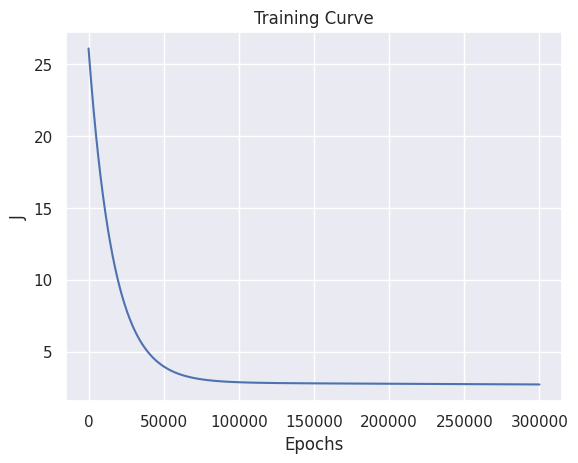

In [64]:
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([7, 8, 9])
my_reg = MVLinearRegression()
my_reg.fit(X,y,eta=1e-6,epochs=3e5,show_curve=True)

In [ ]:
y_hat1 = knn.predict(np.array([[]]),K=3)
y_hat1

In [ ]:
def predict_live_price(longitude, latitude, garage, lot_acres, rooms, price_per_sqft, category_price_per_sqft):
    input_features = np.array([[longitude, latitude, garage, lot_acres, rooms, price_per_sqft, category_price_per_sqft]])
    predicted_price = knnr.predict(input_features, K=3)
    return predicted_price[0]
predicted_price = predict_live_price()
print(f"Predicted Price: ${predicted_price:.4f}")